In [1]:
from fastai.vision import *
from fastai import *


In [2]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
folder = 'baseball'
file = 'download (5)'

In [4]:
path = Path('data/pics')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
folder = 'cricket'
file = 'download (6)'

In [7]:

path = Path('data/pics')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
download_images(path/file, dest, max_pics=200)

In [9]:
classes = ['baseball','cricket']

In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

baseball


cricket


In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

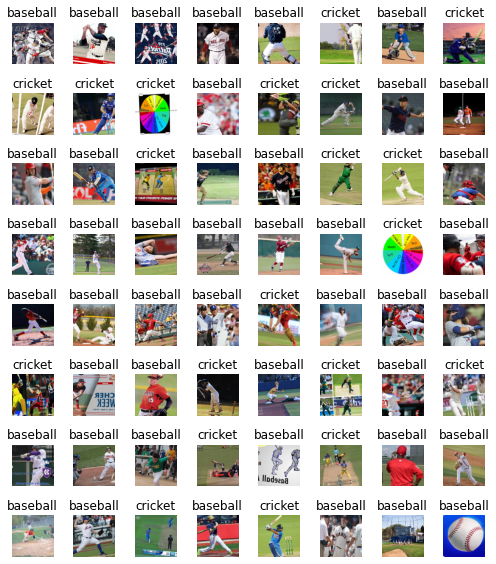

In [12]:
data.show_batch(rows=12, figsize=(7,8))

In [13]:
def conv(ni,nf):
  return nn.Conv2d(ni,nf,kernel_size=3,stride=2,padding=1)

In [14]:
model=nn.Sequential(
    conv(3,8),
    nn.BatchNorm2d(8),
    nn.ReLU(),  
    conv(8,16),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16,32),
    nn.BatchNorm2d(32),
    nn.ReLU(),  
    conv(32,64),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    conv(64,128),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    conv(128,256),
    nn.BatchNorm2d(256),
    nn.ReLU(),
      conv(256,128),
    nn.BatchNorm2d(128),
    nn.ReLU(),
      conv(128,64),
    nn.BatchNorm2d(64),
    nn.ReLU(),
      conv(64,2),
    nn.BatchNorm2d(2),
    nn.ReLU(),
   
 
    Flatten(),
    #nn.Linear(256,128),
    #nn.Linear(128,32),
    #nn.Linear(32,2) 
    #nn.Softmax(), # remove (1,1) grid  
               # this flattens the 3 dim into single vector of 10 outputs 

)

In [15]:
learn=Learner(data, model , loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [16]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 112, 112]        224        True      
______________________________________________________________________
BatchNorm2d          [8, 112, 112]        16         True      
______________________________________________________________________
ReLU                 [8, 112, 112]        0          False     
______________________________________________________________________
Conv2d               [16, 56, 56]         1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 56, 56]         32         True      
______________________________________________________________________
ReLU                 [16, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [32, 28, 28]         4,640      True      
___________________________________________________

In [ ]:
#doc(nn.Conv2d)

In [17]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


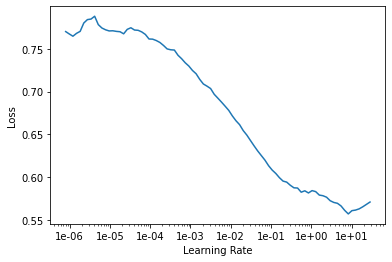

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(10, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.752624,0.691117,0.645833,00:02
1,0.689744,0.693149,0.333333,00:02
2,0.652805,0.683523,0.520833,00:02
3,0.621555,0.890297,0.416667,00:02
4,0.601350,1.146556,0.416667,00:02
5,0.579660,0.830395,0.437500,00:02
6,0.565519,0.648432,0.520833,00:02
7,0.549589,0.565434,0.604167,00:02
8,0.535904,0.526315,0.645833,00:02
9,0.527910,0.506951,0.687500,00:02


In [ ]:
#learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
#print(learn.summary())

In [20]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


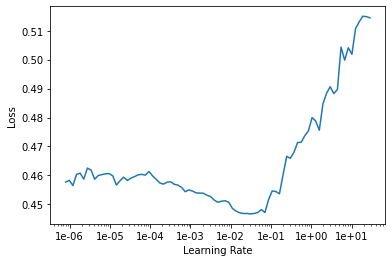

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(10,1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.462919,0.499232,0.666667,00:02
1,0.462818,0.496076,0.666667,00:02
2,0.466429,0.496937,0.666667,00:02
3,0.462073,0.499368,0.687500,00:02
4,0.462446,0.497440,0.687500,00:02
5,0.461668,0.497184,0.687500,00:02
6,0.464825,0.494491,0.687500,00:02
7,0.465413,0.496592,0.687500,00:02
8,0.462458,0.497197,0.687500,00:02
9,0.463201,0.497415,0.687500,00:02


In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


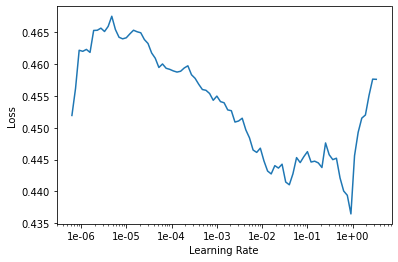

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(10,1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.446042,0.596334,0.708333,00:02
1,0.461610,2.297789,0.375000,00:02
2,0.516951,20.150913,0.604167,00:02
3,0.541417,93.324028,0.416667,00:02
4,0.529306,16.209480,0.375000,00:02
5,0.509138,3.754057,0.375000,00:02
6,0.486740,1.735760,0.458333,00:02
7,0.473107,0.989749,0.479167,00:02
8,0.454598,0.670199,0.645833,00:02
9,0.440276,0.526237,0.750000,00:02


In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


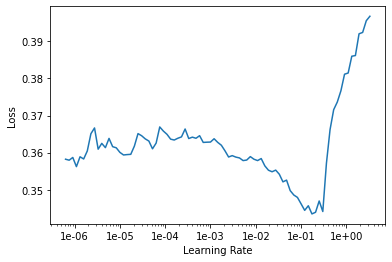

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(10,1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.335975,0.472002,0.791667,00:02
1,0.340552,0.434139,0.791667,00:02
2,0.340533,0.391921,0.812500,00:02
3,0.337426,0.480950,0.833333,00:02
4,0.328034,0.533061,0.750000,00:02
5,0.334878,0.304309,0.875000,00:02
6,0.322805,0.655777,0.729167,00:02
7,0.317497,0.419154,0.833333,00:02
8,0.313172,0.357625,0.854167,00:02
9,0.306473,0.322312,0.875000,00:02


In [29]:
interp = ClassificationInterpretation.from_learner(learn)

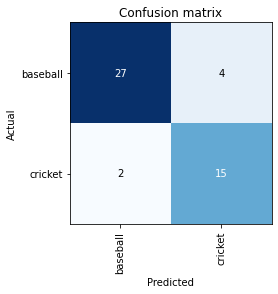

In [30]:
interp.plot_confusion_matrix()

In [31]:
from fastai.widgets import *

In [32]:
data.classes

['baseball', 'cricket']

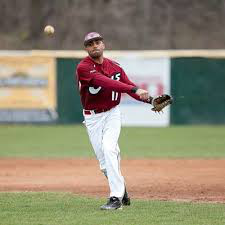

In [34]:

img = open_image(path/'baseball.jpg')
img

In [36]:
pred_class,pred_idx,outputs = learn.predict(img) 
pred_class

Category tensor(0)

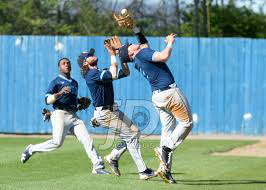

In [54]:

img1 = open_image(path/'baseball2.jpg')
img1

In [55]:
pred_class,pred_idx,outputs = learn.predict(img1) 
pred_class.obj

'baseball'

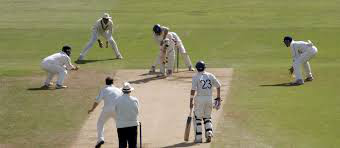

In [52]:
img3 = open_image(path/'cricket2.jpg')
img3

In [53]:
pred_class,pred_idx,outputs = learn.predict(img3) 
pred_class.obj

'cricket'

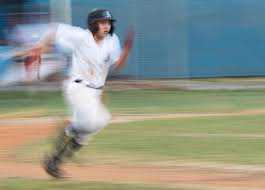

In [48]:
img4 = open_image(path/'baseball'/'00000020.jpg')
img4

In [50]:
pred_class,pred_idx,outputs = learn.predict(img4) 
pred_class.obj

'baseball'

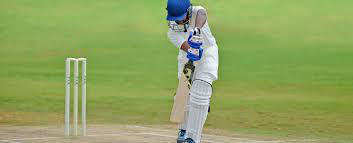

In [57]:
img5 = open_image(path/'cricket3.jpg')
img5

In [58]:
pred_class,pred_idx,outputs = learn.predict(img5) 
pred_class.obj

'cricket'